# <center>Лабораторна робота №3. <br> Візуальний аналіз даних про публікації на сайті Хабрахабр</center>

**Заповніть код в клітинках**

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Завантаження і знайомство з даними

Для роботи вам знадобляться поепердньо оброблені дані з платформи kaggle (https://www.kaggle.com/c/howpop-habrahabr-favs).

Доступ до даних на google drive, якщо ви відкриваєте блокнот в google colab, а не на PC, можна отримати шляхом монтування google drive

In [ ]:
"""
Uncomment next sections if use google collabs
!pip install google-colab
!pip install pydrive
"""

In [3]:
"""
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
"""

In [4]:
"""
downloaded = drive.CreateFile({'id':"16Wj6nzdFU_HGBuWWlQK70rrajmX7FjsJ"})
downloaded.GetContentFile('howpop_train.csv')
"""


In [5]:
#df = pd.read_csv('howpop_train.csv')
df = pd.read_csv('howpop_train.csv')

In [6]:
df.shape

(134137, 17)

In [7]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Позбавимося відразу від змінних, назви яких закінчуються на `_lognorm` (потрібні для змагань на Kaggle). Виберемо їх за допомогою `filter()` і видаимо `drop`-ом:

In [8]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столвбці 
        inplace = True) # позбавляє від необхідності зберігати датасет

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [10]:
df.describe(include = ['object', 'bool'] # бінарні і категоріальні змінні
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/44783/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [11]:
# налаштування зовнішнього вигляду графіків в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Стовбець **`published`** (час публікації) містить рядки. Щоб ми мали змогу працювати з цими даними як з датою/часом публікації, приведемо їх до типу `datetime`:

In [12]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Створимо декілька стовбців на основі даних про час публікації:

In [13]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,2,18
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,2,18
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,2,18
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,3,1
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,1,3,14


-----
Відтепер Ваша черга. В кожному пункті пропонується побудувати картинку і з її допомогою відповісти на питання. Звичано, можна спробувати відповісти на всі питання лише використовуючи Pandas, без картинок, але ми радимо Вам потренуватися будувати (красиві) візуалізації.   

## 1\. В якому місяці (і якого року) було більше всього публікацій?

* березень 2016
* березень 2015
* квітень 2015
* квітень 2016

[Text(0, 0.5, 'Months'), Text(0.5, 0, 'Overall posts')]

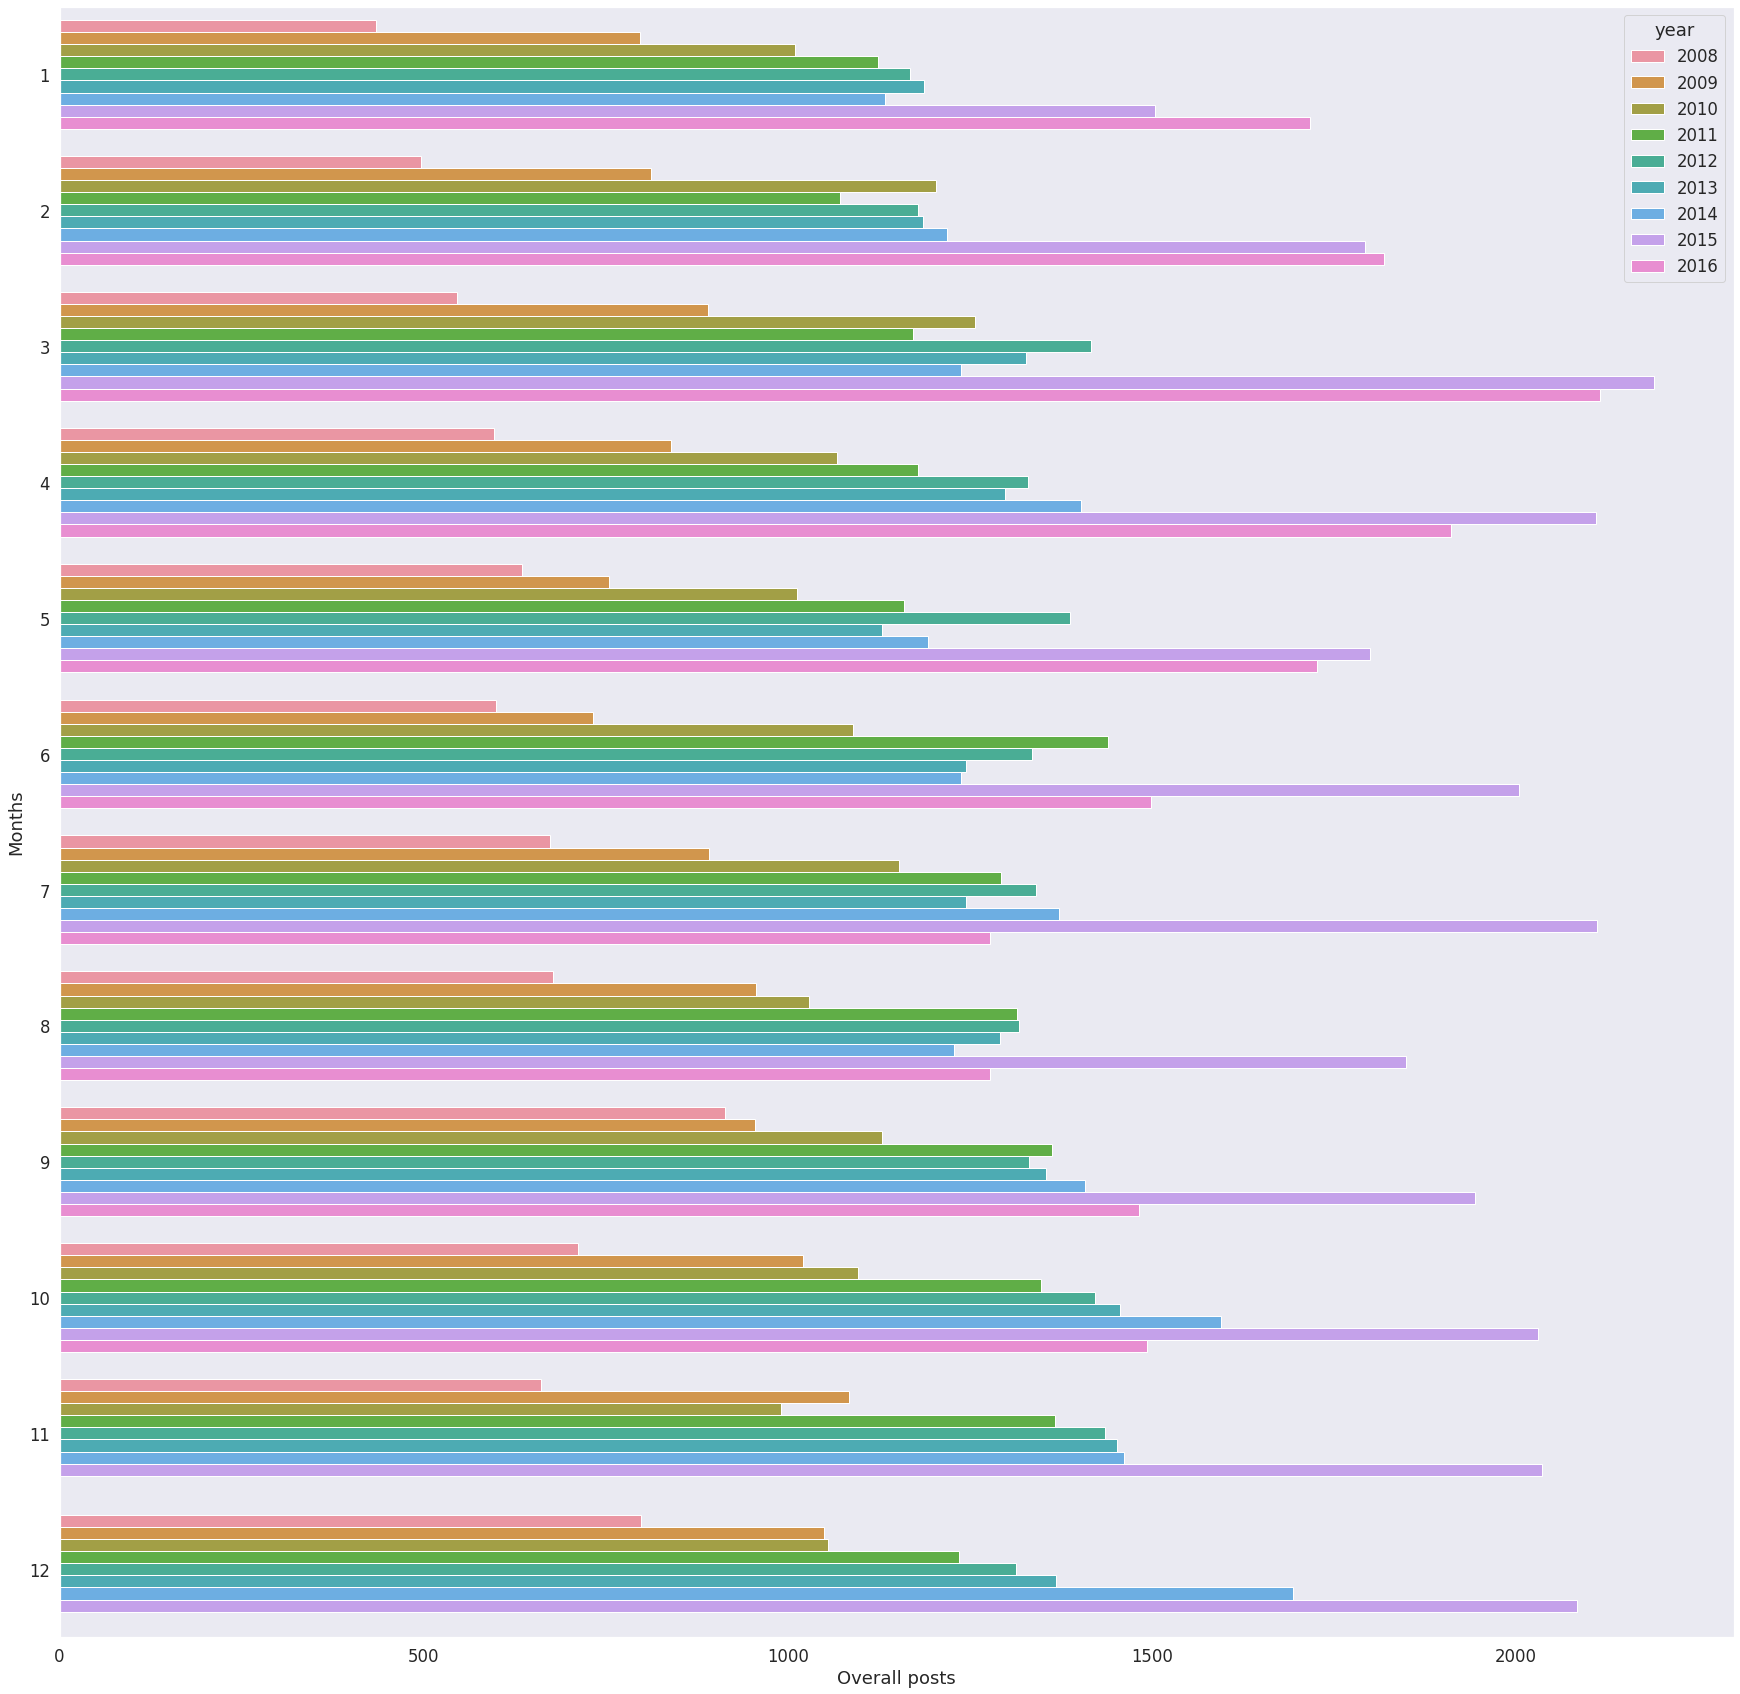

In [14]:
plt.figure(figsize=(30, 30))
ax = sns.barplot(x="post_id", y="month", hue="year", estimator=len, data=df, orient="h")
ax.set(ylabel="Months", xlabel="Overall posts")

In [15]:
# find year and month
months_years_count = pd.crosstab(df["month"], df["year"])
max_year = months_years_count.max(0).idxmax()
max_month = months_years_count.max(1).idxmax()
max_year, max_month

(2015, 3)

## 2\. Проаналізуйте публікації в месяці з попереднього питання

Виберіть один чи декілька варіантів:

* Один чи декілька днів сильно виділяються із загальної картини
* На хабрі _завжди_ більше статей, ніж на гіктаймсі
* По суботам на гіктаймс і на хабрахабр публікують приблизно одинакову кількість статей

Підказки: побудуйте графік залежності числа публікацій від дня; використовуйте параметр `hue`; не переймайтесь сильно з відповідями і не шукайте прихованого змісту :)

In [16]:
# choose pulications from chosen month and year
chosen_posts = df[(df["month"] == max_month) & (df["year"] == max_year)]
chosen_posts.head(2)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
97666,https://habrahabr.ru/post/251783/,habrahabr.ru,251783,2015-03-01 00:00:00,@SLY_G,develop,False,49647,Введение в разработку слайд-шоу на JavaScript,6,375,42900,15.0,4.0,2015,3,7,0
97667,https://habrahabr.ru/company/kolibrios/blog/23...,habrahabr.ru,239033,2015-03-01 00:09:00,NaN,develop,False,8581,Дайджест KolibriOS #7: как мы зиму перезимовали,14,22,17600,36.0,2.0,2015,3,7,0


[Text(0, 0.5, 'Days of week'), Text(0.5, 0, 'Number of posts')]

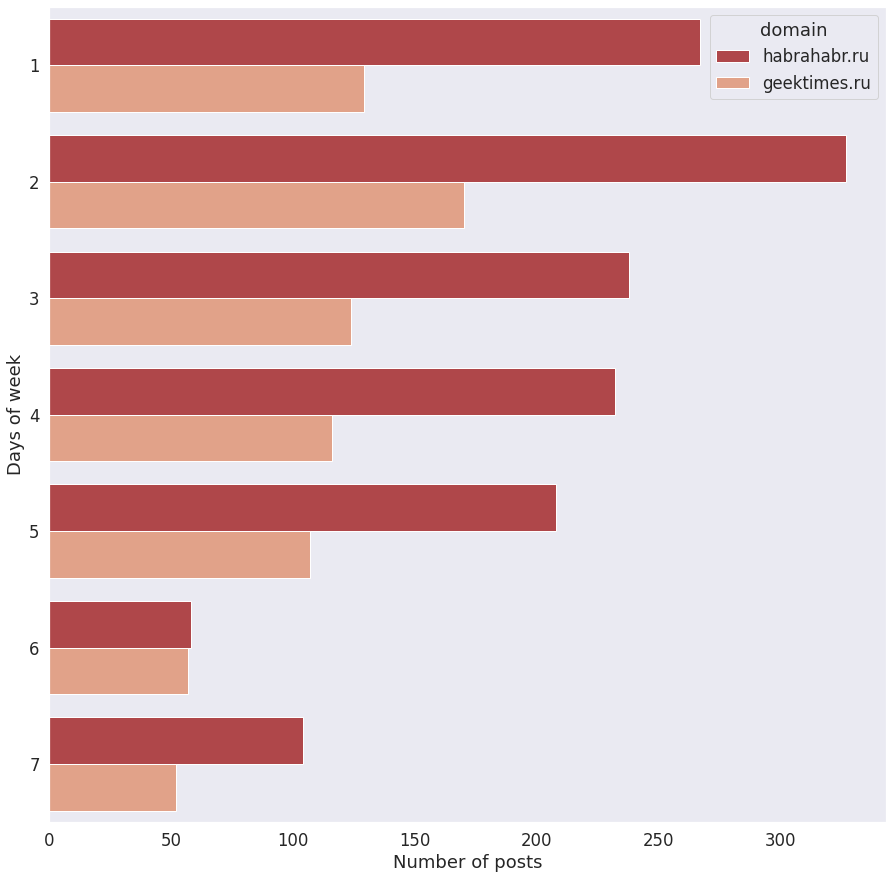

In [17]:
# joined plot for all answers
plt.figure(figsize=(15, 15))
ax = sns.barplot(x="post_id", y="dayofweek", hue="domain", estimator=len, data=chosen_posts, orient="h")
ax.set(ylabel="Days of week", xlabel="Number of posts")

# 1 - True(Saturdays), 2 - True, 3 - True

## 3\. Коли найкраще всього опублікувати статтю?

* Більш всього переглядів набирають статті, опубліковані в 12 годин дня
* В опублікованих о 10-й ранку постів більше всього коментарів
* Більше всього переглядів набирають статтті, опубліковані в 6 годин ранку
* Максимальне число коментарів на гіктаймсі набрала стаття, опублікована в 9 годин вечора
* На хабрі денні статті комментують частіше, ніж вечірні

[Text(0, 0.5, 'Hour of the day'), Text(0.5, 0, 'Number of comments')]

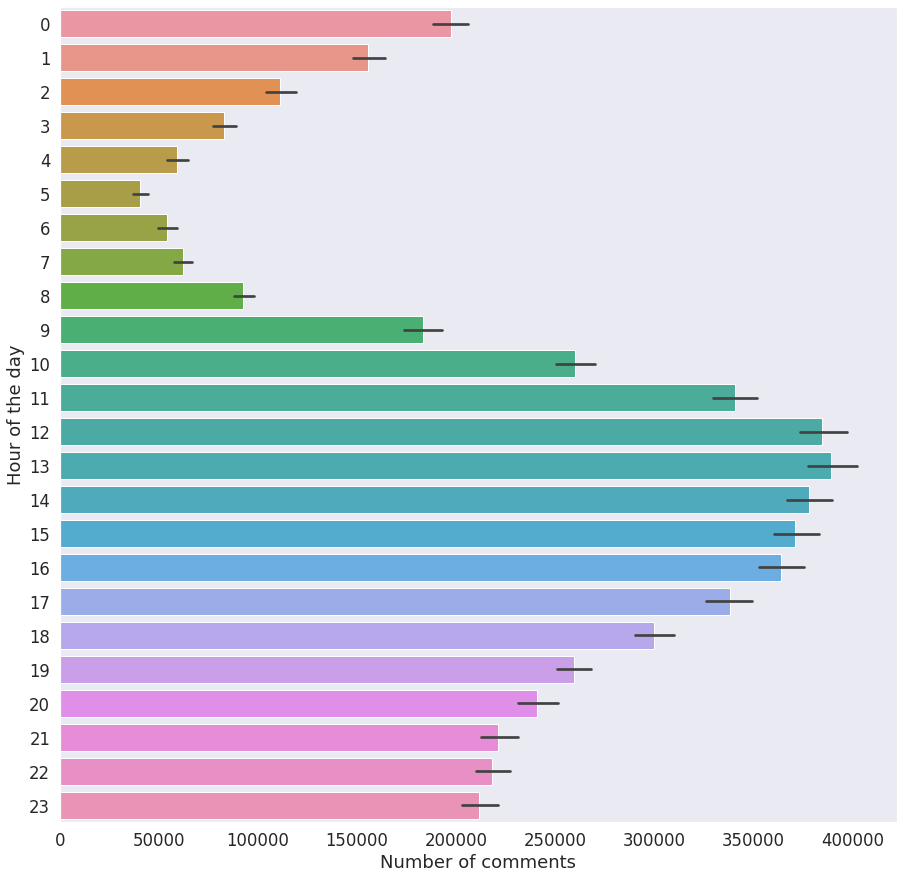

In [18]:
plt.figure(figsize=(15, 15))
ax = sns.barplot(x="comments", y="hour", data=df, orient="h", estimator=sum)
ax.set(xlabel="Number of comments", ylabel="Hour of the day")

[Text(0, 0.5, 'Hour of the day'), Text(0.5, 0, 'Number of views')]

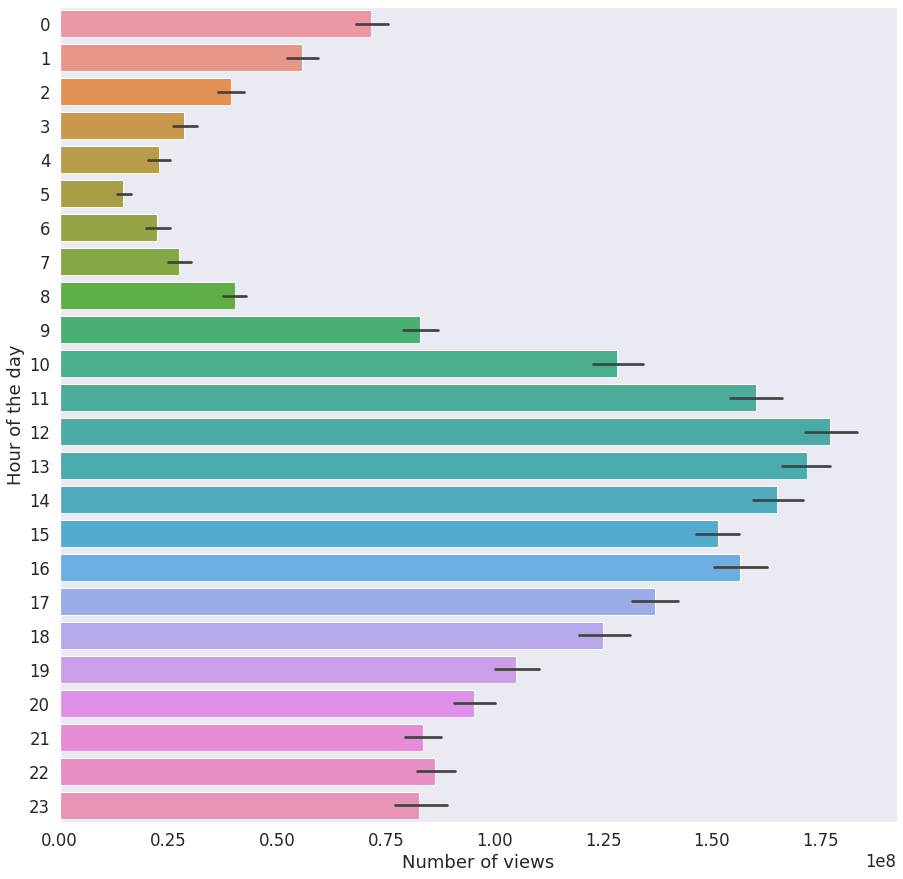

In [19]:
plt.figure(figsize=(15, 15))
ax = sns.barplot(x="views", y="hour", data=df, orient="h", estimator=sum)
ax.set(xlabel="Number of views", ylabel="Hour of the day")

## 4\. Кого з топ-20 авторів частіше всього мінусують?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

In [ ]:
authors = ["@Mordatyj", "@Mithgol", "@alizar", "@ilya42"]
chosen_author_posts = df[df["author"].isin(authors)]
chosen_author_posts.head(2)

In [ ]:
plt.figure(figsize=(15, 15))
ax = sns.barplot(x="votes_minus", y="author", data=chosen_author_posts, orient="h", estimator=sum)
ax.set(xlabel="Minuses overall", ylabel="Authors")

## 5\. Порівняйте суботи і понеділки

Чи правда, що по суботам автори пишуть в основному вдень, а по понедількам — в основному вечером?

In [ ]:
days = [1,6] # monday=1, saturday=6
chosen_posts_days = df[df["dayofweek"].isin(days)]
chosen_posts_days.head(2)

In [ ]:
plt.figure(figsize=(15, 15))
ax = sns.barplot(x="post_id", y="dayofweek", hue="hour", data=chosen_posts_days, orient="h", estimator=len)
ax.set(xlabel="Posts overall", ylabel="Days of week")

In [20]:
plt.figure(figsize=(15, 15))
ax = sns.barplot(x="post_id", y="dayofweek", hue="hour", data=chosen_posts_days, orient="h", estimator=len)
ax.set(xlabel="Posts overall", ylabel="Days of week")

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
66,https://geektimes.ru/post/18472/,geektimes.ru,18472,2008-01-09 15:35:00,@alizar,NaN,False,2399,Мифические животные как бренды,37,4,956,22.0,2.0,2008,1,3,15
69,https://habrahabr.ru/post/18477/,habrahabr.ru,18477,2008-01-09 16:50:00,@alizar,design,False,1586,В Китае вводят государственные лицензии для се...,3,0,211,2.0,1.0,2008,1,3,16


[Text(0, 0.5, 'Authors'), Text(0.5, 0, 'Minuses overall')]

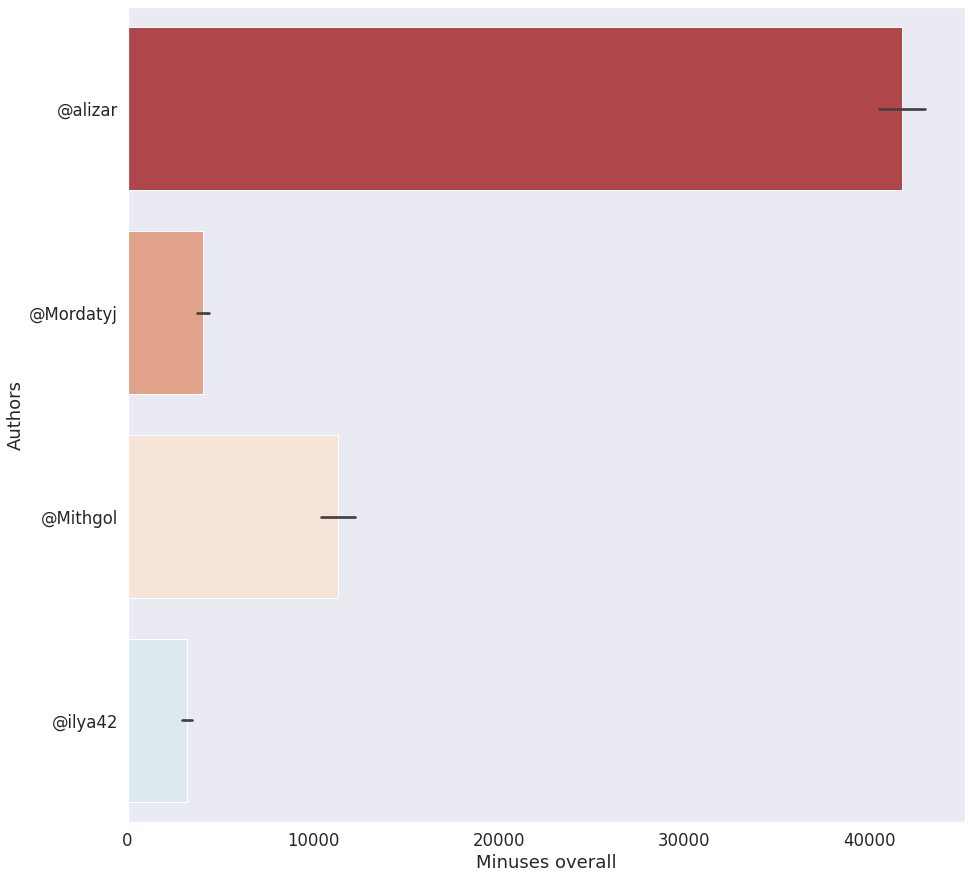

In [21]:
plt.figure(figsize=(15, 15))
ax = sns.barplot(x="votes_minus", y="author", data=chosen_author_posts, orient="h", estimator=sum)
ax.set(xlabel="Minuses overall", ylabel="Authors")

## 5\. Порівняйте суботи і понеділки

Чи правда, що по суботам автори пишуть в основному вдень, а по понедількам — в основному вечером?

In [22]:
days = [1,6] # monday=1, saturday=6
chosen_posts_days = df[df["dayofweek"].isin(days)]
chosen_posts_days.head(2)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
24,https://habrahabr.ru/post/18349/,habrahabr.ru,18349,2008-01-05 13:10:00,@calg0n,admin,False,1301,Установка драйвера для видяхи NVIDIA в Ubuntu ...,18,2,656,8.0,5.0,2008,1,6,13
25,https://habrahabr.ru/post/18356/,habrahabr.ru,18356,2008-01-05 17:26:00,@agl666,misc,False,1037,Скрытие всей ветки комментариев если родительс...,6,0,158,6.0,3.0,2008,1,6,17


[Text(0, 0.5, 'Days of week'), Text(0.5, 0, 'Posts overall')]

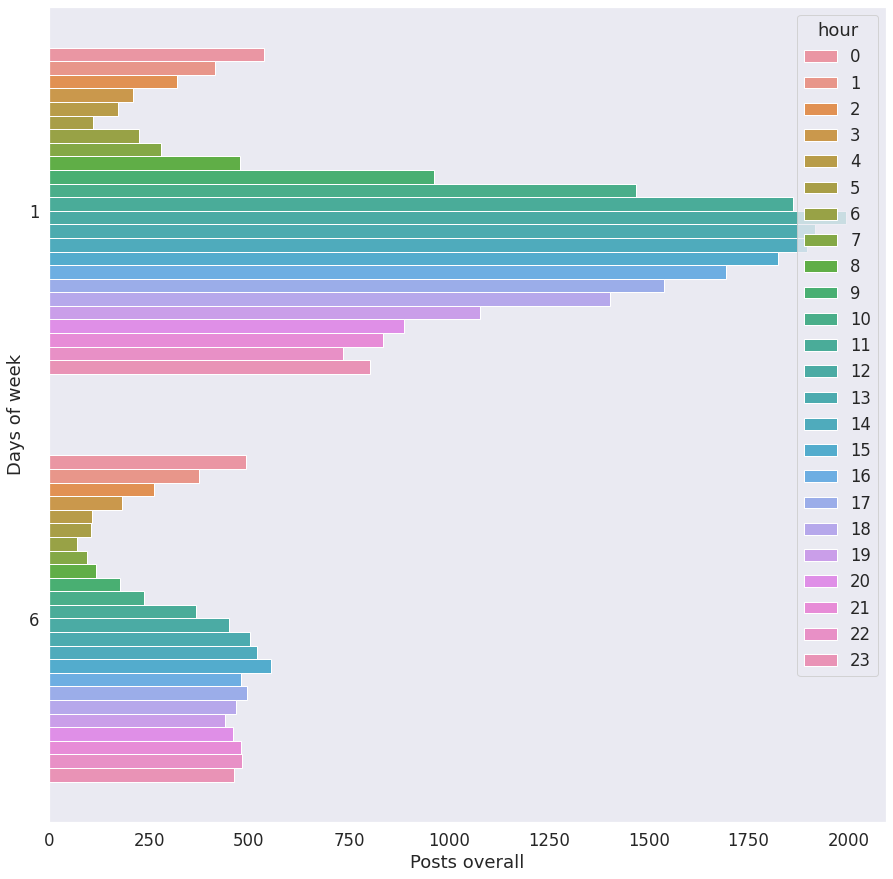

In [23]:
plt.figure(figsize=(15, 15))
ax = sns.barplot(x="post_id", y="dayofweek", hue="hour", data=chosen_posts_days, orient="h", estimator=len)
ax.set(xlabel="Posts overall", ylabel="Days of week")